<a href="https://colab.research.google.com/github/LucaRodrigues/int_artificial/blob/main/Final_Luca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nesta atividade utilizaremos conceitos de inteligencia artificial, com o intuito de realizar uma análise de um conjunto de dados para criar modelos que serão capazes de predizer corretamente os resultados que se deseja obter.

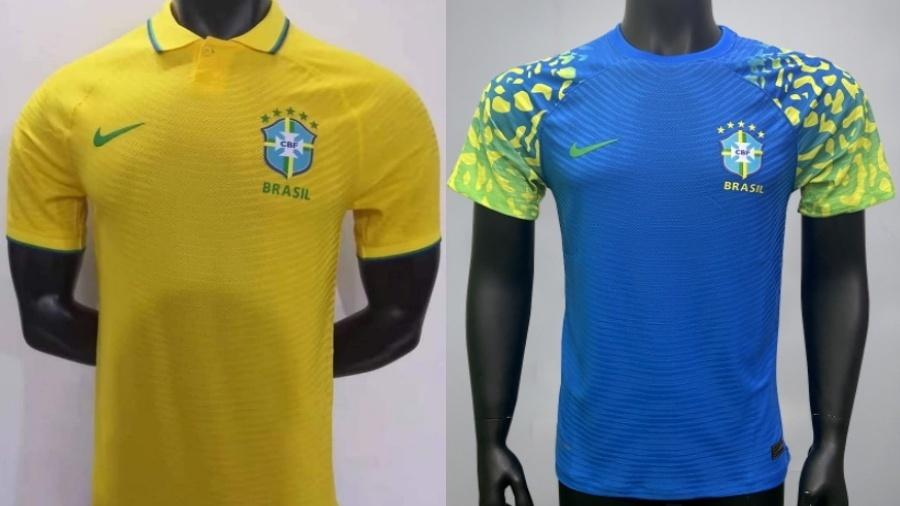



Para que seja possivel a criação deses modelos e necessario que certas bibliotecas seja importadas, pois são elas que disponibilizarão as ferramentas que serão utilizadas

In [ ]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import math
from math import sqrt, pi, exp
from scipy.stats import norm


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve

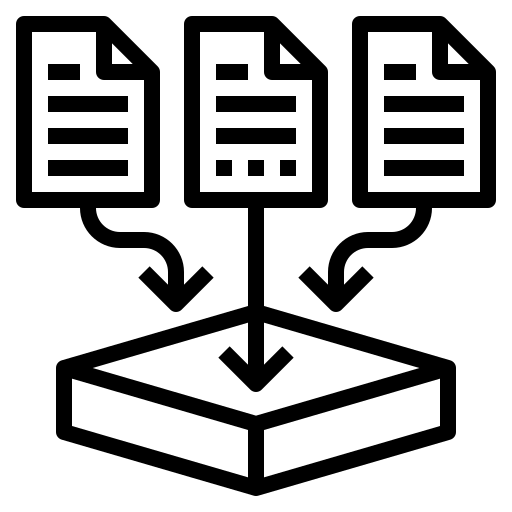


O próximo passo é importar os dados para o ambiente onde será tratado para termos uma visão mais clara sobre como esses dados são distribuídos, ou se existem espaços em branco ou colunas que serão modificadas.

In [ ]:
arquivo = 'https://raw.githubusercontent.com/LucaRodrigues/int_artificial/main/chinese_soccer_orders.csv'
dados = pd.read_csv(arquivo)
dados.head()

,order_id,order_date,sku,team_shirt,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Real Madrid shirt,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Real Madrid shirt,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Flamengo Shirt,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Real Madrid shirt,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Real Madrid shirt,M,264,1,264


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   team_shirt  527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


In [ ]:
dados.shape

(527, 8)

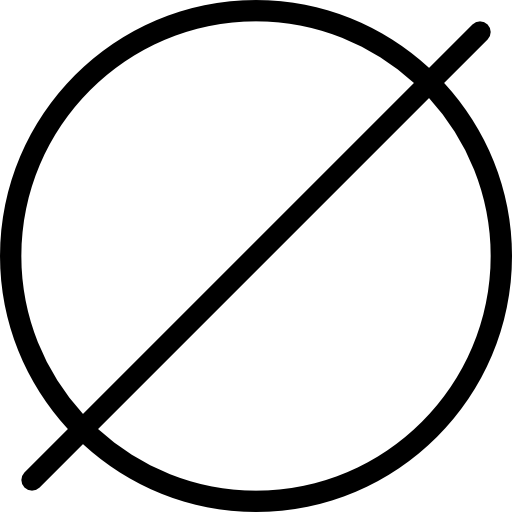

É importante analisar a ausência de dados quando identificada pois essas ausências afetam a eficiência do modelo o que pode ocasionar inúmeros erros e a imprecisão da análise.

In [ ]:
dados.isna().sum().to_frame('Valor Vazio')

,Valor Vazio
order_id,0
order_date,0
sku,0
team_shirt,0
size,37
unit_price,0
quantity,0
revenue,0


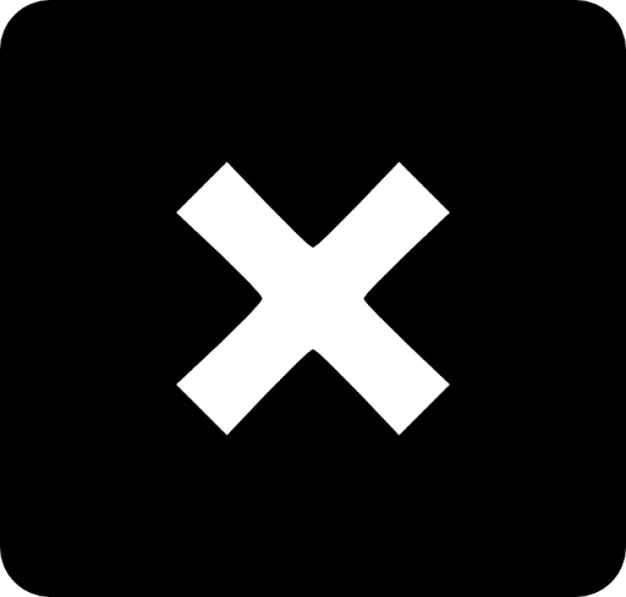

Em alguns casos, notamos que algumas colunas não possuem tanta importância e com isso podemos excluí-las para facilitar a aplicação dos modelos de predição.

In [ ]:
dados = dados.drop(columns = ['order_date','order_id'])

dados.head()

,sku,team_shirt,size,unit_price,quantity,revenue
0,708,Real Madrid shirt,2XL,298,1,298
1,89,Real Madrid shirt,2XL,258,1,258
2,bobo,Flamengo Shirt,One Size,228,1,228
3,799,Real Madrid shirt,XL,264,1,264
4,799,Real Madrid shirt,M,264,1,264


In [ ]:
dados.info()

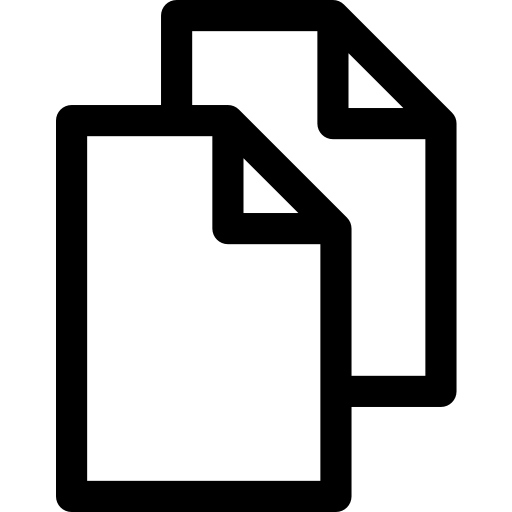


Essa parte consistem em buscar entre os conjuntos de dados classes que se repetem, é a partir dessas classes que avaliamos a possibilidade de transformação de colunas, para que fique compatível com os modelos que serão utilizados.

In [ ]:
sku = dados['sku'].drop_duplicates()


sku

In [ ]:
team_shirt = dados['team_shirt'].drop_duplicates()


team_shirt

NameError: ignored

In [ ]:
size = dados['size'].drop_duplicates()


size

!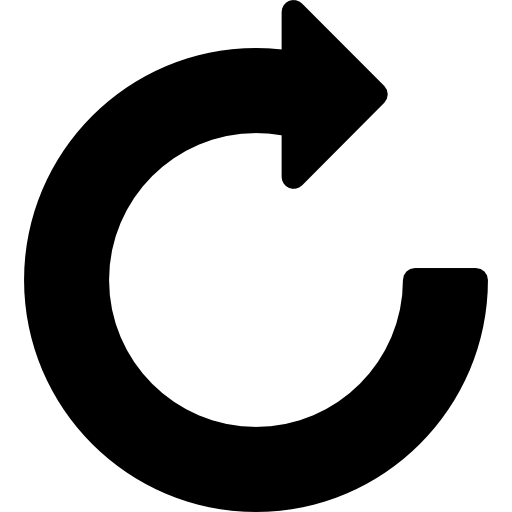


Havendo a necessidades transformamos as colunas para que seus dados possam se encaixar nos modelos de predição que serão utilizados.

In [ ]:

dados = pd.get_dummies(dados,columns=['sku'])

dados.head()

In [ ]:

dados = pd.get_dummies(dados,columns=['color'])

dados.head()

In [ ]:
dados = pd.get_dummies(dados,columns=['size'])

dados.head()

In [ ]:
dados

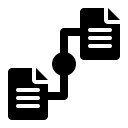


Aqui analizaremos a correlação que utilizamos para a avaliação do grau de interferência dos dados.

In [ ]:
def color_corr ( value_str ):
  try:
    value = float(value_str)
    if value >= 0.6 or value <= -0.6:
      color = 'red'
    else:
      color = 'black'
  except:
          color = 'black'
  return 'color: %s' % color

In [ ]:
dados.corr().style.applymap(color_corr)

,unit_price,quantity,revenue
unit_price,1.000000,-0.021701,0.766968
quantity,-0.021701,1.000000,0.619357
revenue,0.766968,0.619357,1.000000


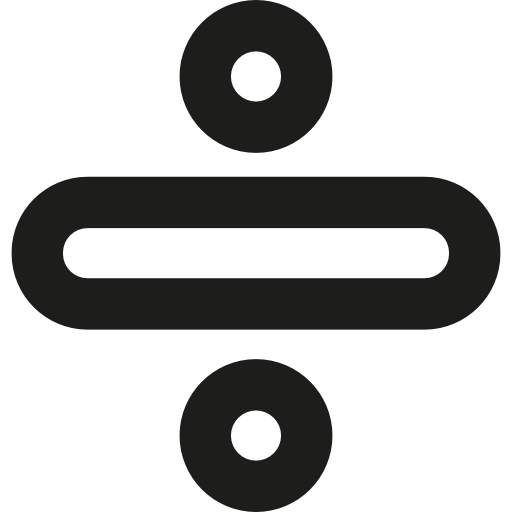


Neste passo dividimimos nossos dados entre o nosso ojetivo como resposta final e os dados que serão uasados de parametro para predizer o resultado, a separação se dá entre treino e teste

In [ ]:
objetivo = 'revenue'



In [ ]:
X = dados.drop( columns = [objetivo], axis = 1 )
X

,sku,team_shirt,size,unit_price,quantity
0,708,Real Madrid shirt,2XL,298,1
1,89,Real Madrid shirt,2XL,258,1
2,bobo,Flamengo Shirt,One Size,228,1
3,799,Real Madrid shirt,XL,264,1
4,799,Real Madrid shirt,M,264,1
...,...,...,...,...,...
522,799,Corinthians Shirt,M,265,1
523,708,Corinthians Shirt,4XL,278,1
524,799,Corinthians Shirt,M,265,1
525,799,Corinthians Shirt,L,265,1


In [ ]:
y = dados[objetivo]
y

0      298
1      258
2      228
3      264
4      264
      ... 
522    265
523    278
524    265
525    265
526    265
Name: revenue, Length: 527, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.6, random_state = 42 )

In [ ]:
X_train

,sku,team_shirt,size,unit_price,quantity
233,77,C,NaN,239,1
489,239,Argentina Shirt,NaN,278,1
329,799,Real Madrid shirt,L,266,1
164,799,Nedherlands Shirt,M,266,1
317,799,Brazil National shirt,XL,278,1
...,...,...,...,...,...
71,708,Flamengo Shirt,3XL,278,1
106,799,Argentina Shirt,M,288,1
270,218,Brazil National shirt,XL,318,1
435,799,Real Madrid shirt,M,288,1


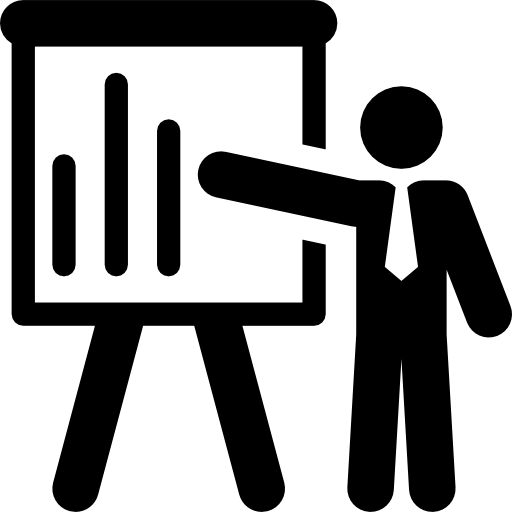

Com os dados seprarodos e tratados podemos aplicar os modelos de predição, que consiste em aplicar algoritimos de aprendizagem de máquina 

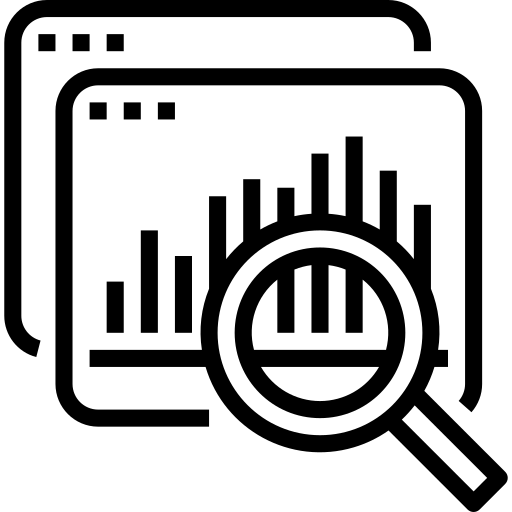

 Aliado a esses algoritmos, utilizamos ferramentas que nos ajudam a avaliar o nível de eficiência de cada algoritimo, para que possamos escolher o que melhor se encaixa em nosso objetivos final

In [ ]:
LR = LinearRegression().fit(X_train, y_train)

In [ ]:
print("Acc Treino:", LR.score(X_train, y_train))
print("Acc Teste:", LR.score(X_test, y_test))

In [ ]:
y_predito = LR.predict(X_test)
y_predito

In [ ]:
plt.scatter(y_test, y_predito)
plt.xlabel('Valor Calculado')
plt.ylabel('Valor Predito')
z = np.polyfit(y_test, y_predito, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r-")
plt.show();

In [ ]:
saida = X.copy()
saida['real'] = y.copy()
saida['predito LR'] = LR.predict(X)
saida['AE'] = np.absolute(saida['real'] - saida['predito LR']) 
saida['MAE'] = metrics.mean_absolute_error(saida['real'], saida['predito LR']) 
saida['MSE'] = metrics.mean_squared_error(saida['real'], saida['predito LR']) 
saida['RMSE'] = np.sqrt(metrics.mean_squared_error(saida['real'], saida['predito LR'])) 
saida['real std'] = np.std(saida['real']) 
saida['predito LR std'] = np.std(saida['predito LR']) 
saida['r2 score'] = metrics.r2_score(saida['real'], saida['predito LR']) 
saida.sort_values(by=['AE'],ascending=False) 

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.7, random_state=42)

In [ ]:
LR  = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT  = DecisionTreeClassifier().fit(train_x, train_y)
KN  = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x,train_y) 
RF  = RandomForestClassifier().fit(train_x,train_y)

In [ ]:
print("Acurácia LR:", LR.score(test_x,test_y), "\n")
print("Acurácia LDA:", LDA.score(test_x,test_y), "\n")
print("Acurácia DT:", DT.score(test_x,test_y), "\n")
print("Acurácia KN:", KN.score(test_x,test_y), "\n")
print("Acurácia SVM:", SVM.score(test_x,test_y), "\n")
print("Acurácia RF:", RF.score(test_x,test_y), "\n")

**Conclusão**

Com os algoritmos aplicados e devidamente testados já podemos ter  uma visão mais clara sobre qual o melhor para essa análise em espefico. 



In [ ]:
saida = X.copy()
saida['real'] = y.copy()
saida['predito LR'] = LR.predict(X)
saida['AE'] = np.absolute(saida['real'] - saida['predito LR']) 
saida['MAE'] = metrics.mean_absolute_error(saida['real'], saida['predito LR']) 
saida['MSE'] = metrics.mean_squared_error(saida['real'], saida['predito LR']) 
saida['RMSE'] = np.sqrt(metrics.mean_squared_error(saida['real'], saida['predito LR'])) 
saida['real std'] = np.std(saida['real']) 
saida['predito LR std'] = np.std(saida['predito LR']) 
saida['r2 score'] = metrics.r2_score(saida['real'], saida['predito LR']) 
saida.sort_values(by=['AE'],ascending=False) 






In [ ]:
print("Acurácia LR:", LR.score(test_x,test_y), "\n")
print("Acurácia LDA:", LDA.score(test_x,test_y), "\n")
print("Acurácia DT:", DT.score(test_x,test_y), "\n")
print("Acurácia KN:", KN.score(test_x,test_y), "\n")
print("Acurácia SVM:", SVM.score(test_x,test_y), "\n")
print("Acurácia RF:", RF.score(test_x,test_y), "\n")